In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('../data_edit/df_edit_with_met.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87648 entries, 0 to 87647
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     87648 non-null  datetime64[ns]
 1   HORA                      87648 non-null  int64         
 2   CAUDAL                    87385 non-null  float64       
 3   CAL_1RIA_KG               29 non-null     float64       
 4   CAL_1RIA_DOSIS            587 non-null    float64       
 5   AGUA_CRUDA_P.H            86915 non-null  float64       
 6   AGUA_CRUDA_COLOR          81508 non-null  float64       
 7   AGUA_CRUDA_NTU            87154 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    68682 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  60092 non-null  float64       
 10  COAGULANTE_GRANULADO      5899 non-null   float64       
 11  COAGULANTE_LIQUIDO        99 non-null     float64       
 12  COAGULANTE_DOSIS  

In [3]:
HEADERS_LIQUIDO = ['FECHA', 'HORA', 'CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 
                   'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_LIQUIDO', 'COAGULANTE_DOSIS','AGUA_TRATADA_CLORO', 
                   'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU', 'VEL_VIENTO', 
                   'PRECIPITACION', 'TEMP_SECA', 'TEMP_HUMEDA']

HEADERS_GRANULADO = ['FECHA', 'HORA', 'CAUDAL', 'CAL_1RIA_KG', 'CAL_1RIA_DOSIS', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 
                     'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_GRANULADO', 
                     'COAGULANTE_DOSIS', 'AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 
                     'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU', 'VEL_VIENTO', 'PRECIPITACION', 'TEMP_SECA', 'TEMP_HUMEDA', 
                     'PRECIPITACION2']

In [4]:
df_liquido = df[df['COAGULANTE_LIQUIDO'].notnull()]
df_liquido = df_liquido[HEADERS_LIQUIDO]
df_granulado = df[df['COAGULANTE_LIQUIDO'].isnull()]
df_granulado = df_granulado[HEADERS_GRANULADO]

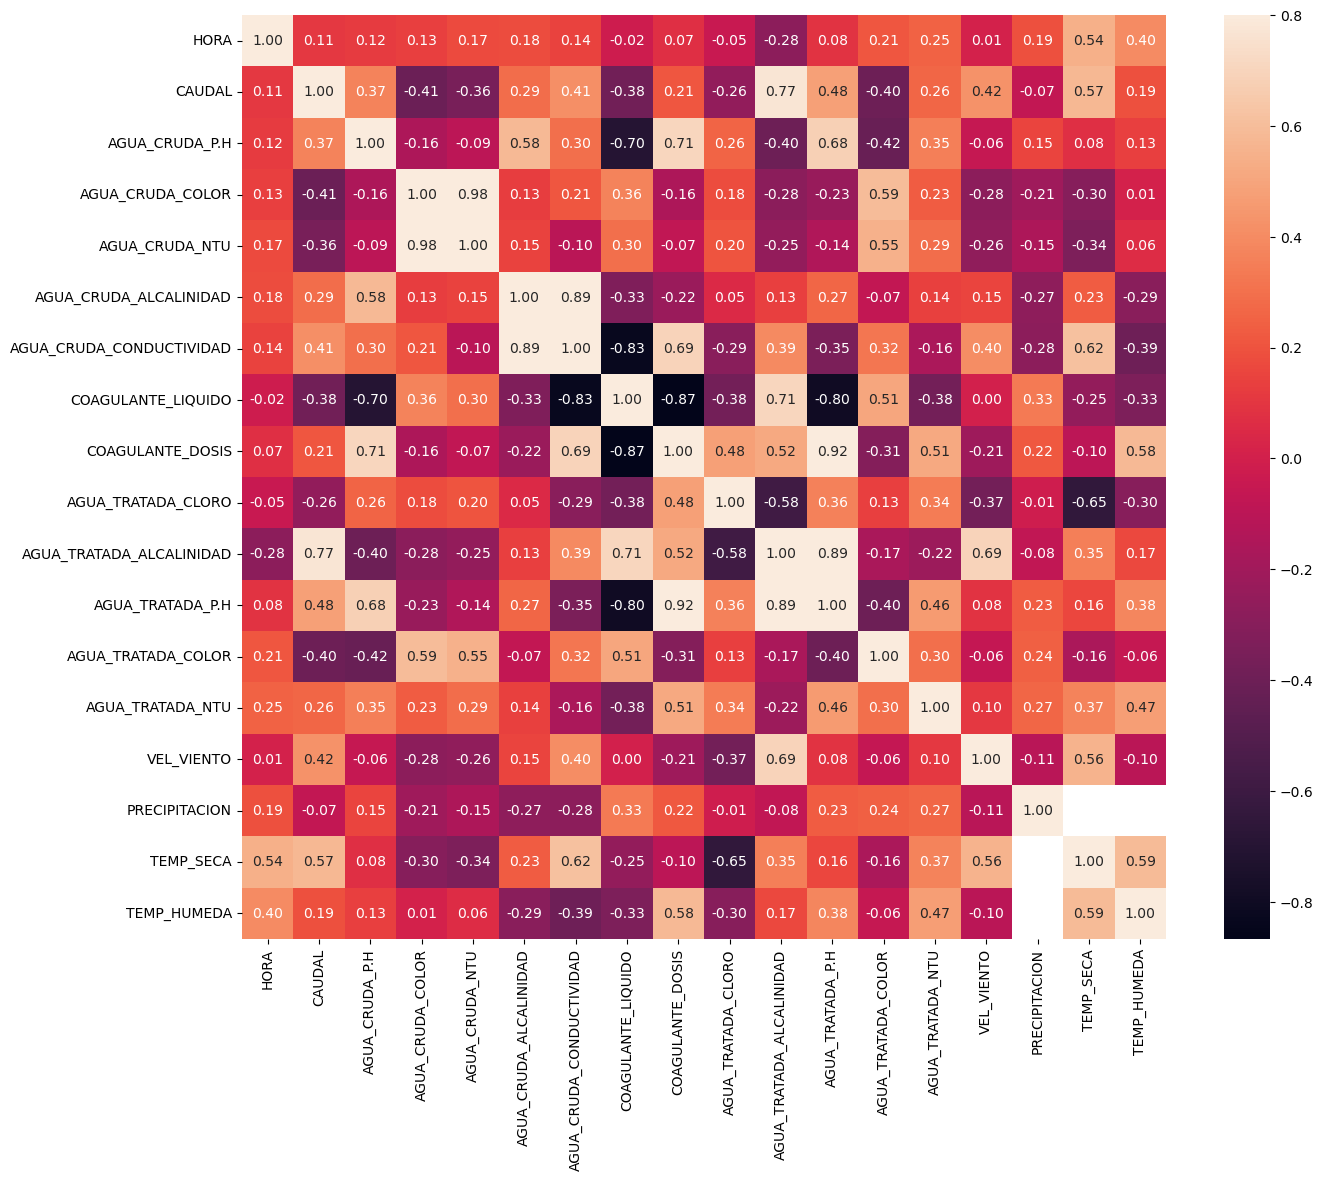

In [6]:
# Matriz de correlación:
corrmat = df_liquido.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [9]:
# Selecciona solo las columnas de tipo float en el DataFrame
df_float = df_liquido.select_dtypes(include=[float])

# Calcula la matriz de correlación
corr = df_float.corr()

# Selecciona las columnas relevantes en la matriz de correlación
corrmat = corr.loc[df_float.columns, ['COAGULANTE_DOSIS']]

# Ordena los valores de correlación y aplica un degradado de color
result = corrmat.sort_values(by='COAGULANTE_DOSIS', ascending=False).style.background_gradient()
result

,COAGULANTE_DOSIS
COAGULANTE_DOSIS,1.000000
AGUA_TRATADA_P.H,0.917572
AGUA_CRUDA_P.H,0.708625
AGUA_CRUDA_CONDUCTIVIDAD,0.692662
TEMP_HUMEDA,0.581757
AGUA_TRATADA_ALCALINIDAD,0.517185
AGUA_TRATADA_NTU,0.514828
AGUA_TRATADA_CLORO,0.476039
PRECIPITACION,0.216977
CAUDAL,0.212138


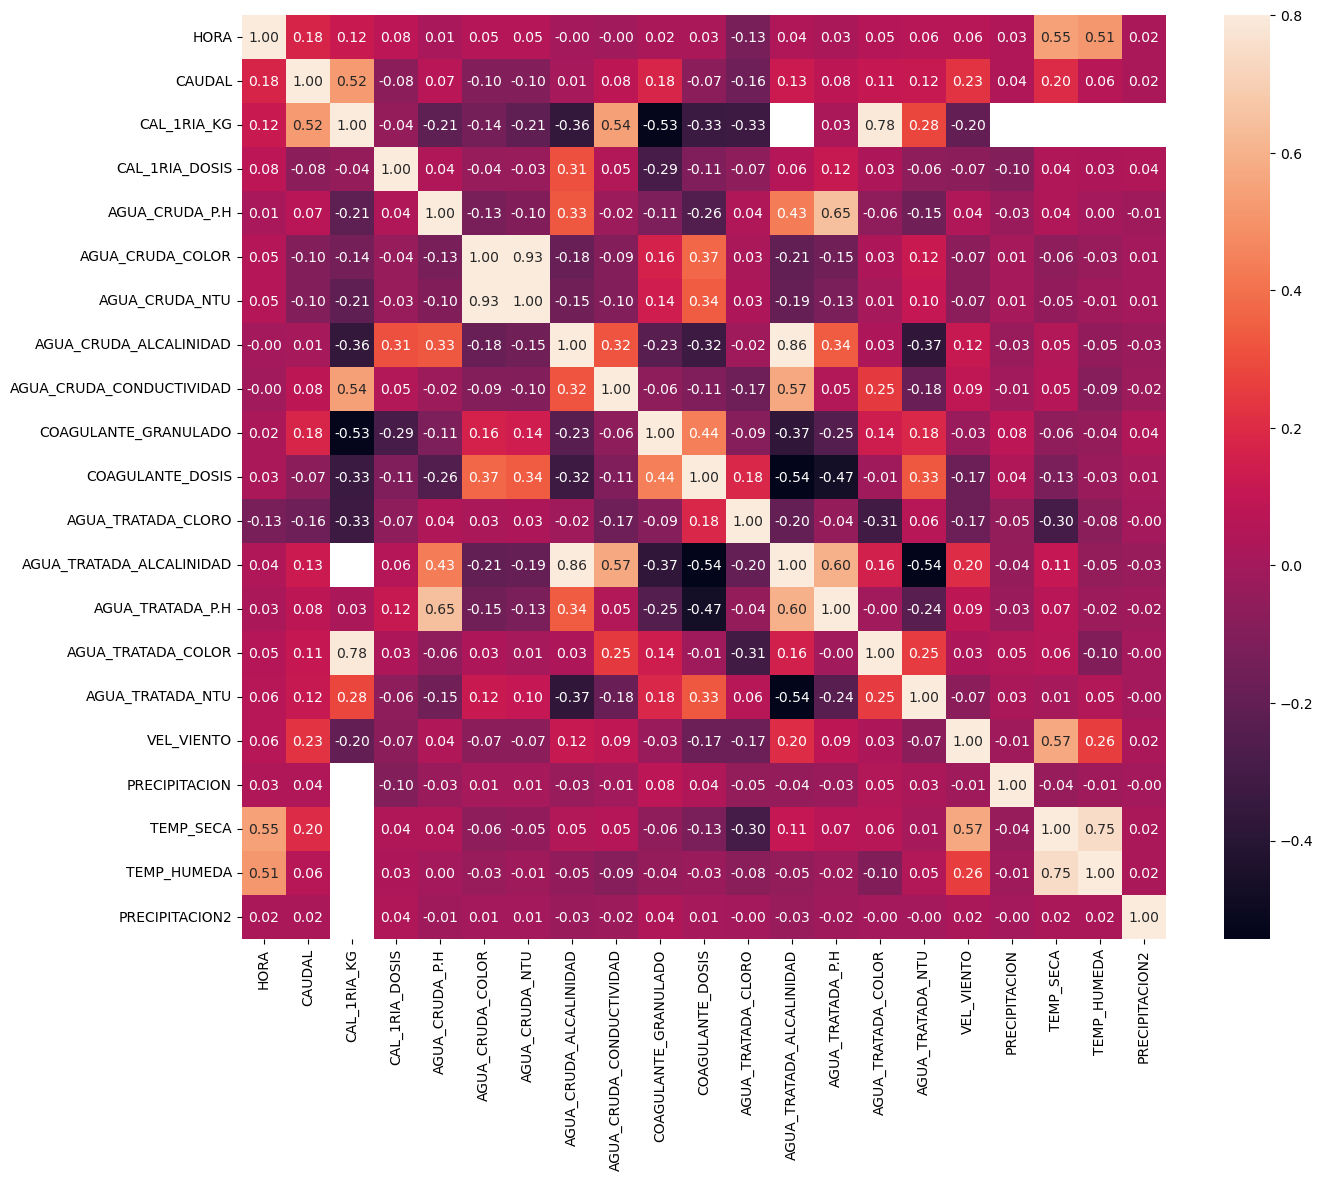

In [7]:
# Matriz de correlación:
corrmat = df_granulado.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [10]:
# Selecciona solo las columnas de tipo float en el DataFrame
df_float = df_granulado.select_dtypes(include=[float])

# Calcula la matriz de correlación
corr = df_float.corr()

# Selecciona las columnas relevantes en la matriz de correlación
corrmat = corr.loc[df_float.columns, ['COAGULANTE_DOSIS']]

# Ordena los valores de correlación y aplica un degradado de color
result = corrmat.sort_values(by='COAGULANTE_DOSIS', ascending=False).style.background_gradient()
result

,COAGULANTE_DOSIS
COAGULANTE_DOSIS,1.000000
COAGULANTE_GRANULADO,0.443153
AGUA_CRUDA_COLOR,0.370374
AGUA_CRUDA_NTU,0.342808
AGUA_TRATADA_NTU,0.328426
AGUA_TRATADA_CLORO,0.182613
PRECIPITACION,0.041060
PRECIPITACION2,0.011133
AGUA_TRATADA_COLOR,-0.011193
TEMP_HUMEDA,-0.028730
